In [0]:
import pandas as pd
import numpy as np

In [0]:
df1 = pd.read_csv('/content/200521COVID19MEXICO.csv',encoding= 'unicode_escape',parse_dates=[0,10,11,12])
df2 = pd.read_excel('/content/actas-defuncion-covid-19-cdmx.xlsx',parse_dates=[1])

In [3]:
df1.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-21,11e989,2,3,27,2,27,27,4,2,2020-04-24,2020-04-20,2020-04-27,2,1,71,1,97,99,1,2,2,2,1,2,2,2,2,2,1,1,99,MÃ©xico,99,2
1,2020-05-21,1aad65,2,4,19,2,5,5,18,2,2020-03-30,2020-03-30,2020-04-03,2,2,66,1,97,2,2,2,2,2,2,1,2,2,2,2,99,1,99,MÃ©xico,99,1
2,2020-05-21,04f631,2,4,14,1,14,14,67,1,2020-04-10,2020-04-07,9999-99-99,97,2,35,1,2,2,2,2,2,2,2,2,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-05-21,02556b,2,4,15,1,15,15,110,2,2020-04-07,2020-04-07,2020-04-20,2,2,67,1,2,2,2,2,2,2,1,2,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-05-21,0356d5,2,4,9,1,9,9,5,2,2020-04-04,2020-04-04,9999-99-99,2,2,61,1,2,2,2,2,2,2,2,1,2,2,2,1,99,1,99,MÃ©xico,99,2


In [4]:
df2.head()

,EDAD,FECHA,SEMANA,MES,RAZON,ACTA
0,41 AÑOS,2020-03-18,12,3,"CHOQUE SEPTICO, NEUMONIA POR COVID 19 POR SARS...",7129
1,61 AÑOS,2020-03-23,13,3,"INSUFICIENCIA RESPIRATORIA AGUDA, NEUMONIA VIR...",4459
2,60 AÑOS,2020-03-26,13,3,"SINDROME DE INSUFICIENCIA RESPIRATORIA AGUDA, ...",4591
3,37 AÑOS,2020-03-26,13,3,NEUMONIA POR CORONAVIRUS,7879
4,63 AÑOS,2020-03-26,13,3,"CERVICOVAGINITIS PURULENTA, CARCINOMA EPIDERMO...",7829


In [5]:
df1.shape

(201838, 35)

In [6]:
df2.shape

(4579, 6)

In [7]:
df1.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [0]:
new = df1[['FECHA_ACTUALIZACION', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF',]].copy()
new1 = df1[['RESULTADO']].copy()

In [9]:
new.head()

,FECHA_ACTUALIZACION,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF
0,2020-05-21,2020-04-24,2020-04-20,2020-04-27
1,2020-05-21,2020-03-30,2020-03-30,2020-04-03
2,2020-05-21,2020-04-10,2020-04-07,9999-99-99
3,2020-05-21,2020-04-07,2020-04-07,2020-04-20
4,2020-05-21,2020-04-04,2020-04-04,9999-99-99


In [10]:
new1.RESULTADO.value_counts()

2    108980
1     59567
3     33291
Name: RESULTADO, dtype: int64

In [0]:
#According to the CATALOGO, 1 means that it is positive, so I'm going to put what it is not positive as NaN So like this I can have only positive values

In [0]:
new1 = new1.replace(2, np.nan)
new1 = new1.replace(3, np.nan)

In [13]:
new1.isnull().sum()

RESULTADO    142271
dtype: int64

In [14]:
new1

,RESULTADO
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
201833,NaN
201834,NaN
201835,NaN
201836,NaN


In [0]:
result = pd.concat([new, new1], axis=1)

In [16]:
result.head()

,FECHA_ACTUALIZACION,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,RESULTADO
0,2020-05-21,2020-04-24,2020-04-20,2020-04-27,1.0
1,2020-05-21,2020-03-30,2020-03-30,2020-04-03,1.0
2,2020-05-21,2020-04-10,2020-04-07,9999-99-99,1.0
3,2020-05-21,2020-04-07,2020-04-07,2020-04-20,1.0
4,2020-05-21,2020-04-04,2020-04-04,9999-99-99,1.0


In [18]:
result.isnull().sum()

FECHA_ACTUALIZACION         0
FECHA_INGRESO               0
FECHA_SINTOMAS              0
FECHA_DEF                   0
RESULTADO              142271
dtype: int64

In [0]:
result = result.dropna()

In [20]:
result.shape

(59567, 5)

In [21]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


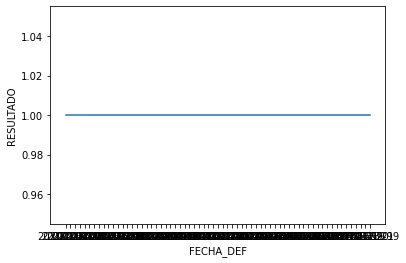

In [23]:
ax = sns.lineplot(x="FECHA_DEF", y="RESULTADO", data=result)